In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Input
# Input 1
# Liquid property
mu_input=10.8       #Viscosity [mPas]
sigma_input=67.64   #Surface tension [mN/m]
theta_d_input=85    #DCA degree
theta_s_input=60    #SCA degree

# Input 2
# Operabiltiy window for Gap=200 um, Roll coater in MCPL
Q_low_limit_input=0       #Unit= [mL/min]
Q_high_limit_input=100    #Unit= [mL/min]
H0_input=200              #Unit= [um] Uniform die lip configuration in MCPL
Ld_input=800.0            #Ld=Lu [um] in MCPL
width_input=0.1           #width of web = 0.1 m in MCPL

In [9]:
 lst_input=[Q_low_limit_input, Q_high_limit_input, width_input, H0_input, Ld_input, mu_input, sigma_input, theta_d_input, theta_s_input]

In [10]:
def jibreakupreal(q,c,H0,Ld,mu,sigma):   #Bead Break-up
    a=6.0*(Ld/H0)*mu/sigma         #Unit=[m/s]
    model=2.0/H0*q + c/a*60     #Unit=[m/min]
    return model

def jiweepingreal(q,c,H0,Ld,mu,sigma):     #Weeping
    a=6.0*(Ld/H0)*mu/sigma           #Unit=[m/s]
    model=1.0/H0*q + c/a/2.0*60   #Unit=[m/min]
    return model

In [99]:
# Main Function
# lst_input=[Q_low_limit_input, Q_high_limit_input, h0_input, width_input, Ld_input, mu_input, sigma_input, theta_d_input, theta_s_input]
# n =num of Experiment sets; n =num of Rgt sets; n =num of Gap sets; n =num of Operability windows

def operability_window_n(n, lst_input):
    Q_low_limit, Q_high_limit, width, H0, Ld, mu, sigma, theta_d, theta_s = lst_input
    Q=np.linspace(Q_low_limit, Q_high_limit, 11)     #Unit=[mL/min]
    q=Q/width     #폭당 유량 = Q/폭 = Q/width        #Unit=[mL/m/min]
    
    c=np.cos(theta_d/180*np.pi)+np.cos(theta_s/180*np.pi) #Cosine term. It should be revised as 'c =2.68*[mu*V(Rgt=2)/sigma]**(2/3)'
    Rgts=np.linspace(2,3,n)
    h0s=H0/Rgts
    
    fig=plt.figure(figsize=(8,8*n))                  #n =num of Operability windows
    plt.tight_layout()
    for i, h0 in enumerate(h0s,1):
        limit_bb=jibreakupreal(q,c,H0,Ld,mu,sigma)   #Unit=[m/min]
        limit_w=jiweepingreal(q,c,H0,Ld,mu,sigma)    #Unit=[m/min]
        Q_V_line=Q/width/h0                          #V_w =Q/width/target_wet_thickness; If one of Q and V_w is defined, then the other is automatically defined. Both should be changed simultaneously.
        
        axi=fig.add_subplot(n,1,i)                                                                                #Plot Operability window
        axi.set_title(r'For $\: h_{0}= %.1f \: \mathrm{\mu m}, \: H_{0}= %.1f \: \mathrm{\mu m},\: R_\mathrm{gt}=%.1f ,\:  \cos{\theta_\mathrm{d}}+\cos{\theta_\mathrm{s}} = %.1f   $ '%(h0, H0, H0/h0,c))
        axi.plot(Q,limit_bb, 'r', linestyle='-', label='Bead Break-up', marker='o')                               #Bead Break-up limit in the Operability window
        axi.plot(Q,limit_w,  'b', linestyle='-', label='Weeping', marker='o')                                     #Weeping limit in the Operability window
        string=r'$ Q-V_\mathrm{w} $ line with' + r' $ \: R_\mathrm{gt}= %.2f $'%(H0/h0)
        axi.plot(Q,Q_V_line, 'g', linestyle=':', label= string , marker='o')                  #Q-V_w line in the Operability window
        
        for X,Y in zip(Q, limit_bb):
            axi.annotate('{:.1f}'.format(Y), (X,Y), textcoords='offset points',xytext=(0,5))
        for X,Y in zip(Q, limit_w):
            axi.annotate('{:.1f}'.format(Y), (X,Y),  textcoords='offset points',xytext=(0,-10))
        for X,Y in zip(Q, Q_V_line):
            axi.annotate('{:.1f}'.format(Y), (X,Y),  textcoords='offset points',xytext=(0,0))
        
        axi.set_xlabel(r'$ Q [\mathrm{mL/min}] $' , fontsize=18)
        axi.set_ylabel(r'$ V_\mathrm{w} [\mathrm{m/min}]$' , fontsize=18)
        axi.set_xlim(Q_low_limit, Q_high_limit)
        axi.set_ylim(0.0, )
        
        plt.legend()
        plt.grid()
    return 


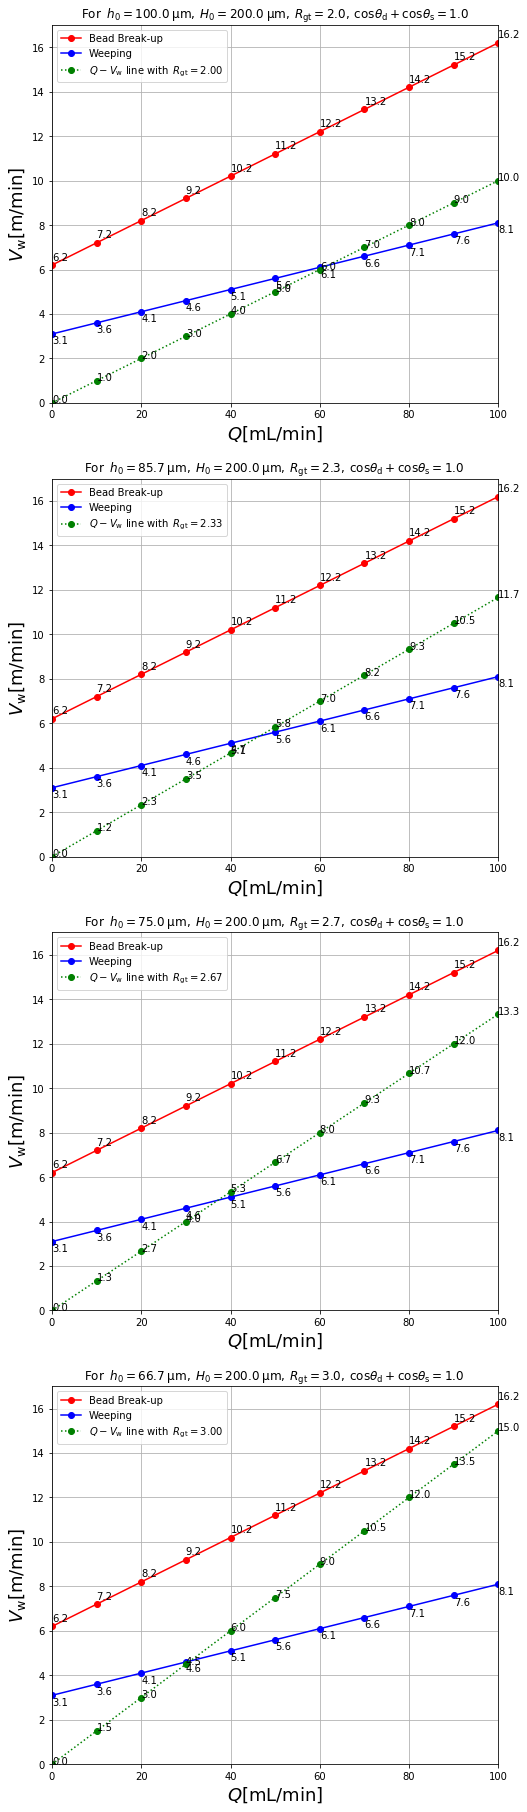

In [100]:
operability_window_n(4,lst_input)

# Another Version #

In [101]:
# Main Function
# lst_input=[Q_low_limit_input, Q_high_limit_input, h0_input, width_input, Ld_input, mu_input, sigma_input, theta_d_input, theta_s_input]
# n =num of Experiment sets; n =num of Rgt sets; n =num of Gap sets; n =num of Operability windows

def operability_window(n, lst_input):
    Q_low_limit, Q_high_limit, width, H0, Ld, mu, sigma, theta_d, theta_s = lst_input
    Q=np.linspace(Q_low_limit, Q_high_limit, 11)     #Unit=[mL/min]
    q=Q/width     #폭당 유량 = Q/폭 = Q/width        #Unit=[mL/m/min]
    
    c=np.cos(theta_d/180*np.pi)+np.cos(theta_s/180*np.pi) #Cosine term. It should be revised as 'c =2.68*[mu*V(Rgt=2)/sigma]**(2/3)'
    Rgts=np.linspace(2,3,n)               
    Rgts=np.flip(Rgts)                           #Reverse the order => Rgt will be decreased.  
    h0s=H0/Rgts
    
    fig, axes=plt.subplots(2,1,figsize=(7,14))   #n =num of Rgt lines
    limit_bb=jibreakupreal(q,c,H0,Ld,mu,sigma)   #Unit=[m/min]
    limit_w=jiweepingreal(q,c,H0,Ld,mu,sigma)    #Unit=[m/min]
    
    axes[0].plot(Q,limit_bb, 'r', linestyle='-', label='Bead Break-up', marker='o')                               #Bead Break-up limit in the Operability window
    axes[0].plot(Q,limit_w,  'b', linestyle='-', label='Weeping', marker='o')                                     #Weeping limit in the Operability window
    for X,Y in zip(Q, limit_bb):
        axes[0].annotate('{:.1f}'.format(Y), (X,Y), textcoords='offset points',xytext=(0,5))
    for X,Y in zip(Q, limit_w):
        axes[0].annotate('{:.1f}'.format(Y), (X,Y),  textcoords='offset points',xytext=(0,-10))
    
    for i, h0 in enumerate(h0s,1):        
        Q_V_line=Q/width/h0                          #V_w =Q/width/target_wet_thickness; If one of Q and V_w is defined, then the other is automatically defined. Both should be changed simultaneously.

        string= r' $ \: R_\mathrm{gt}= %.2f $'%(H0/h0)
        axes[0].plot(Q,Q_V_line, 'g', linestyle=':', label= string , marker='o')                  #Q-V_w line in the Operability window
        for X,Y in zip(Q, Q_V_line):
            axes[0].annotate('{:.1f}'.format(Y), (X,Y),  textcoords='offset points',xytext=(0,0))
    
    axes[0].set_title(r'When the gap is fixed as $\: H_{0}= %.1f \: \mathrm{\mu m};\:  \cos{\theta_\mathrm{d}}+\cos{\theta_\mathrm{s}} = %.1f   $ '%(H0, c))
    axes[0].set_xlabel(r'$ Q [\mathrm{mL/min}] $' , fontsize=18)
    axes[0].set_ylabel(r'$ V_\mathrm{w} [\mathrm{m/min}]$' , fontsize=18)
    axes[0].set_xlim(Q_low_limit, Q_high_limit)
    axes[0].set_ylim(0.0, )
        
    axes[0].legend()
    axes[0].grid()
    # axes[1].axis('off')  # If one want to remain blank then, axes[1].axis('off'). It will give you an white space.
    fig.delaxes(axes[1])   # Delete the blank subplot object; 
    return 


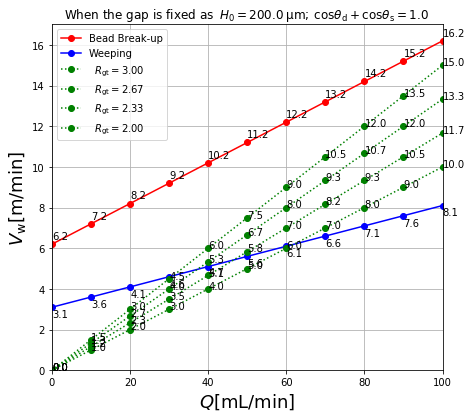

In [102]:
operability_window(4,lst_input)

In [103]:
# 72 wt% glycerol/water solution
mu_input= 25
sigma_input= 62
theta_d_input= 60
theta_s_input= 60
lst_input=[Q_low_limit_input, Q_high_limit_input, width_input, H0_input, Ld_input, mu_input, sigma_input, theta_d_input, theta_s_input]

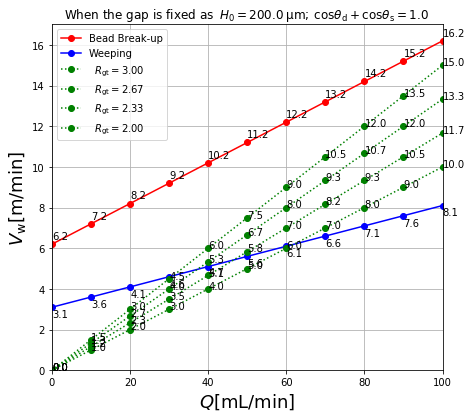

In [104]:
operability_window(4, lst_input)